In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
import time
from datetime import date

sys.path.append('/home/ollie/loziel/pyfesom2/SkillMetrics')
import skill_metrics as sm
import cartopy.crs as ccrs
import pickle

sys.path.append('/home/ollie/loziel/pyfesom2/')
import pyfesom2 as pf
import matplotlib.cm as cm
import cmocean.cm as cmo

sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/')

In [2]:
var = 'DIC'

In [3]:
# run paths -------------------------------------------------------------------------------------
## you can use an automatic incrementation of result paths below

base_resultpath = '/work/ollie/loziel/model_output/fesom2.1_recom/B'
run_names=['02','03','04','05','06','07','08','11','14','15']
number_of_runs = np.size(run_names)

resultpath = [None] * number_of_runs
for i in range(0,number_of_runs):
    resultpath[i] = base_resultpath+run_names[i]

## Or you can enter the result paths mannually here

# resultpath1 = ['/work/ollie/loziel/model_output/fesom2.0_recom/B01',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B02',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B03',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B04',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B05',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B06',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B07',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B08',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B09',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B10',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B11',
# '/work/ollie/loziel/model_output/fesom2.0_recom/B12']

# Choose number of columns you want in the plot
number_of_columns = 2
number_of_lines = int(number_of_runs / number_of_columns)

# Choose figure size
figure_size = (15,15)

In [4]:
# export of analysis ------------------------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")
runid      =  'fesom'
savepath = '/home/ollie/loziel/pyfesom2/outputs/B0112/'
htmlname     =  'comparison_DIN_' + today +'.html'
htmlpath = '/home/ollie/loziel/pyfesom2/outputs/B0112/'
export_html = False
meshpath = '/work/ollie/loziel/mesh/core2_meanz'
evalpath      = '/work/ollie/projects/MarESys/evaluation/'

ncfileDIC                = evalpath+'GLODAPv2.2016b.TCO2.nc'

# period of analysis ------------------------------------------------------------------------------------

first_year = 1958
last_year  = 1968

years = np.arange(first_year,last_year+1,1)

# just to check
print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
    resultpath, savepath, htmlpath, htmlname,years[0],years[-1]))

Processing years 1958 to 1968

Reading out of ['/work/ollie/loziel/model_output/fesom2.1_recom/B02', '/work/ollie/loziel/model_output/fesom2.1_recom/B03', '/work/ollie/loziel/model_output/fesom2.1_recom/B04', '/work/ollie/loziel/model_output/fesom2.1_recom/B05', '/work/ollie/loziel/model_output/fesom2.1_recom/B06', '/work/ollie/loziel/model_output/fesom2.1_recom/B07', '/work/ollie/loziel/model_output/fesom2.1_recom/B08', '/work/ollie/loziel/model_output/fesom2.1_recom/B11', '/work/ollie/loziel/model_output/fesom2.1_recom/B14', '/work/ollie/loziel/model_output/fesom2.1_recom/B15']
Storing graphs to /home/ollie/loziel/pyfesom2/outputs/B0112/
Storing html to /home/ollie/loziel/pyfesom2/outputs/B0112/ as comparison_DIN__2021_07_31.html


In [5]:
# years as array for x axis
xyears = range(first_year, last_year+1)

# mesh initialization 
mesh = pf.load_mesh(meshpath)

/work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2


# Load GLODAP

In [6]:
!jupyter nbconvert --to=python ../GlobalAssessment/DIC_Glodap_Comparison_python3.ipynb
!jupyter nbconvert --to=python ../GlobalAssessment/load_interp_GLODAP_python3.ipynb
from DIC_Glodap_Comparison_python3 import DICcomp

DIC = [None] * number_of_runs
for i in range(0,number_of_runs):
    DIC[i] = DICcomp(runid,resultpath[i],savepath,mesh,ncfileDIC,first_year,last_year,
                 layerwise=False,output=True,plotting=False,depth_limit = 50,Taylor=False)

[NbConvertApp] Converting notebook ../GlobalAssessment/DIC_Glodap_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15397 bytes to ../GlobalAssessment/DIC_Glodap_Comparison_python3.py
[NbConvertApp] Converting notebook ../GlobalAssessment/load_interp_GLODAP_python3.ipynb to python
[NbConvertApp] Writing 7314 bytes to ../GlobalAssessment/load_interp_GLODAP_python3.py
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please consider choosing max depth level 43 with max depth at -5275.0!
***
***
Loading GLODAP file: /work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc
***
***
Depth greater in FESOM (-6125.0) than in GLODAP (-5500.0)
Please cons

array([<GeoAxesSubplot:title={'center':'02'}>,
       <GeoAxesSubplot:title={'center':'03'}>,
       <GeoAxesSubplot:title={'center':'04'}>,
       <GeoAxesSubplot:title={'center':'05'}>,
       <GeoAxesSubplot:title={'center':'06'}>,
       <GeoAxesSubplot:title={'center':'07'}>,
       <GeoAxesSubplot:title={'center':'08'}>,
       <GeoAxesSubplot:title={'center':'11'}>,
       <GeoAxesSubplot:title={'center':'14'}>,
       <GeoAxesSubplot:title={'center':'15'}>], dtype=object)

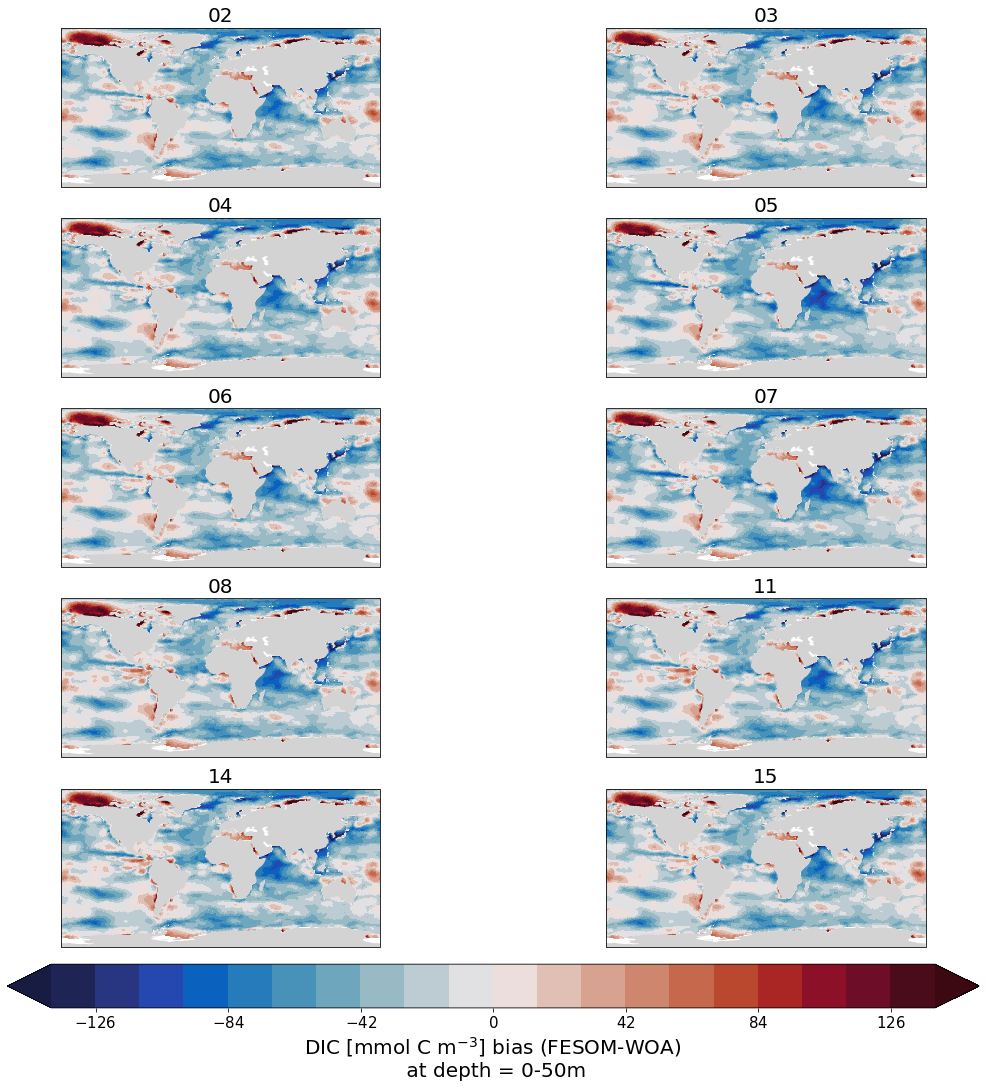

In [7]:
data = []
for i in range(0,number_of_runs):
    data.append(DIC[i].fesom-DIC[i].glodap)
    
unitglodap = 'DIC [mmol C m$^{-3}$]'
labelglodap = 'GLODAP'

# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(-140,140,21),
        units=unitglodap+ ' bias (FESOM-WOA) \n at depth = 0-50m',
        titles = run_names,
        rowscol=[number_of_lines,number_of_columns],
        figsize=figure_size,
        cmap=cmo.balance,
       )

[<GeoAxesSubplot:>]

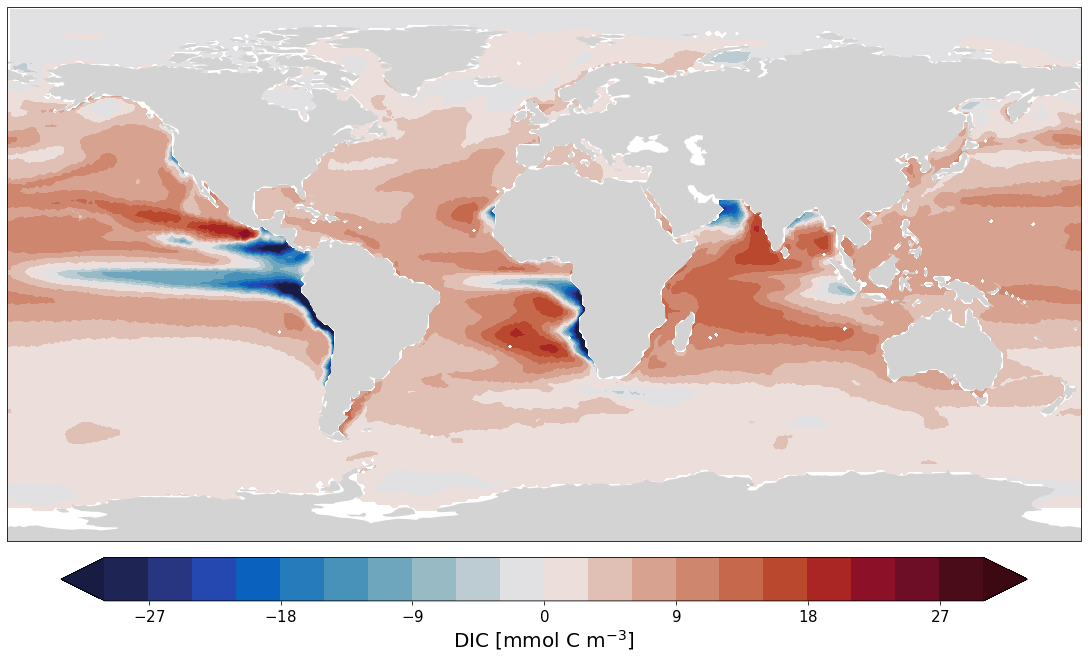

In [9]:
data = DIC[9].fesom-DIC[8].fesom
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(-30,30,21),
        units=unitglodap,
        rowscol=[1,1],
        figsize=figure_size,
        cmap=cmo.balance,
       )

In [ ]:
data = [DIC[9].fesom DIC[8].fesom]
    
# np.shape(data)

pf.plot(mesh, 
        data,
        levels=(-30,30,21),
        units=unitglodap,
        rowscol=[2,1],
        figsize=figure_size,
        cmap=cmo.,
       )